Summary
The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

Feature Description
The table results from a query which joins two tables (actuaclly views): "PhotoObj" which contains photometric data and "SpecObj" which contains spectral data.

To ease your start with the data you can read the feature descriptions below:

View "PhotoObj"
objid = Object Identifier
ra = J2000 Right Ascension (r-band)
dec = J2000 Declination (r-band)

Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.

u = better of DeV/Exp magnitude fit
g = better of DeV/Exp magnitude fit
r = better of DeV/Exp magnitude fit
i = better of DeV/Exp magnitude fit
z = better of DeV/Exp magnitude fit
The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.

run = Run Number
rereun = Rerun Number
camcol = Camera column
field = Field number
Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. A field can be identified by:

run number, which identifies the specific scan,
the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and
the field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
An additional number, rerun, specifies how the image was processed.
View "SpecObj"
specobjid = Object Identifier
class = object class (galaxy, star or quasar object)
The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

redshift = Final Redshift
plate = plate number
mjd = MJD of observation
fiberid = fiber ID
In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.

Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.

Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.

The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding fiberID.



In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
#importing the data
df=pd.read_csv("skyserver.csv")
df.head(10)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,STAR,0.000315,324,51666,594
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,GALAXY,0.100242,287,52023,559
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,STAR,0.000315,3306,54922,515
8,1.237650e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.638290e+17,STAR,0.000089,323,51615,595
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,GALAXY,0.040508,288,52000,400


In [5]:
#checking the shape of the dataset
df.shape

(10000, 18)

In [9]:
#checking the datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null float64
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null object
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


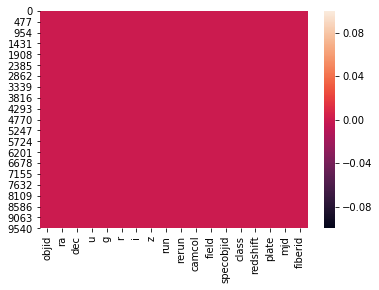

In [7]:
#checking if there are any missing values
sns.heatmap(df.isnull())

In [8]:
df.isnull().sum()
#There are no missing values in the dataset

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

#### Univariate Analysis

In [28]:
list=['objid','run','rerun', 'camcol','field', 'class']
for i in list:
    print(df[i].value_counts())
    print()

1.237650e+18    10000
Name: objid, dtype: int64

756     3060
752     2086
1345     915
1350     540
1140     527
745      453
1035     396
1412     347
1302     246
1331     245
1231     245
1334     212
1239     197
1336     182
1404     137
1045     112
1402      49
308       31
1411      10
1356       4
727        4
1119       1
1332       1
Name: run, dtype: int64

301    10000
Name: rerun, dtype: int64

4    1834
5    1827
6    1769
2    1712
3    1560
1    1298
Name: camcol, dtype: int64

301    62
302    58
304    56
305    55
309    54
       ..
499     1
676     1
507     1
660     1
503     1
Name: field, Length: 703, dtype: int64

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64



Observations:

1. Class has three types. Galaxy, Star and QSO 

QSO means Quasar. A quasar (/ˈkweɪzɑːr/) (also known as a quasi-stellar object abbreviated QSO) is an extremely luminous active galactic nucleus (AGN), in which a supermassive black hole with mass ranging from millions to billions of times the mass of the Sun is surrounded by a gaseous accretion disk. 

Galaxy is a huge collection of gas, dust and billions of stars and their solar systems.

A star is an astronomical object consisting of a luminous spheroid of plasma held together by its own gravity.

2. camcol has six types starting from 1 to 6.

3. rerun has only one value 301 repeated 10,000 times.
rerun represents the reprocessing of the images and 301 is the latest rerun.

4. field has 703 unique values and run has 23 unique values.

5. Objid has single value 1.237650e+18 repeated in 10,000 rows.

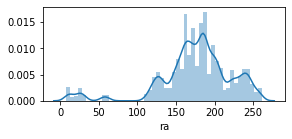

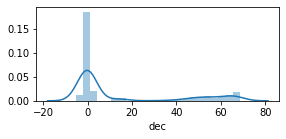

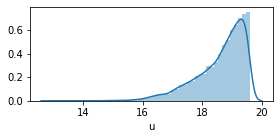

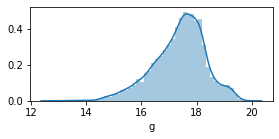

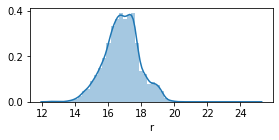

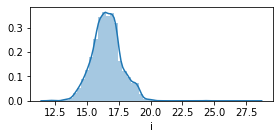

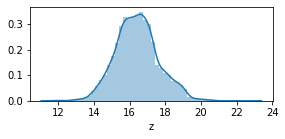

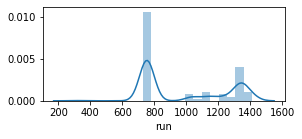

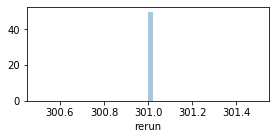

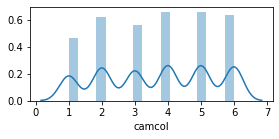

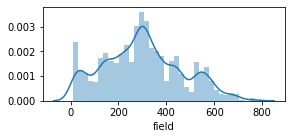

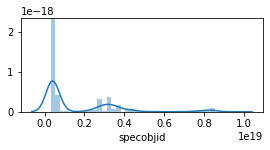

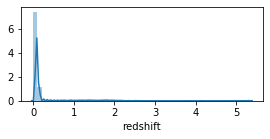

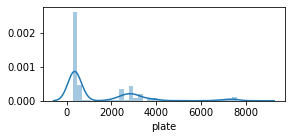

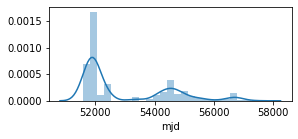

In [23]:
#checking the distribution of the values
for i in df.iloc[:,1:-1]:
    if df[i].dtypes!='O':
        plt.figure(figsize=(20,10))
        plt.subplot(5,4,3)
        sns.distplot(df[i])

Observations:
1. column ra is left skewed. Most of the values is between 150 and 200.
2. column dec is right skewed. Most of the values are between 0 and 1.
3. column u is left skewed and most of the values is between 18 and 20.
4. column g is left skewed and most of the values is between 17 and 18.
5. column r is almost symmetric and most of the value lie between 16 and 18.
6. column i is almost symmetric and most of the value lie between 16 and 17.5.
7. column z is almost symmetric and most of the value lie between 16 and 18.
8. column run is right skewed with most of the values betwen 650 and 800 and few between 1300 and 1400.
9. rerun has only one value at 301.
10. camcol has 6 values from 1 to 6
11. field has most of its values between 250 and 400.
12. specobijid have values between 0.1 to 0.4.
13. redshift have values between 0 and 0.1.
14. plate has major of its values 200-1000
15. mjd has major values around 52000 followed around 54000 and less in 56000

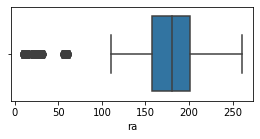

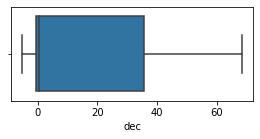

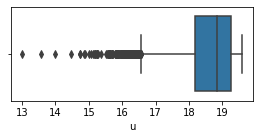

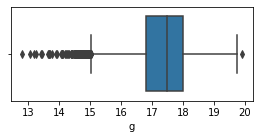

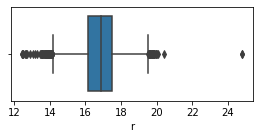

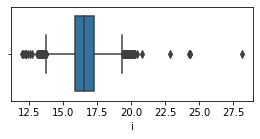

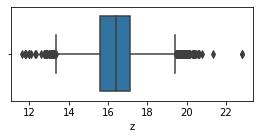

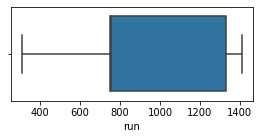

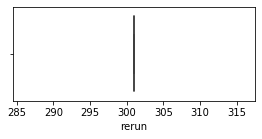

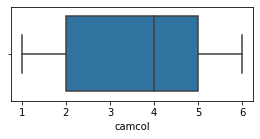

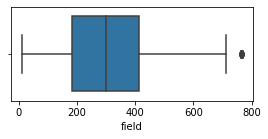

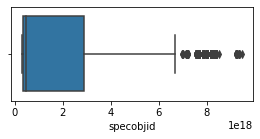

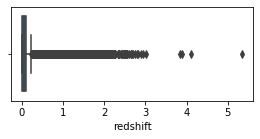

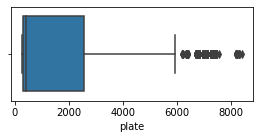

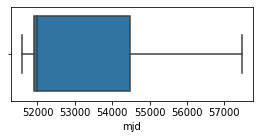

In [26]:
#checking the outliers using boxplot 
for i in df.iloc[:,1:-1]:
    if df[i].dtypes!='O':
        plt.figure(figsize=(20,10))
        plt.subplot(5,4,3)
        sns.boxplot(df[i])

Observations
1. There are no outliers in the columns mjd, camcol, run and dec. 
2. Rerun has one only value hence no outliers.
3. Rest all columns have outliers.

#### Statistical Analysis


In [27]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


1. Objid has single value 1.237650e+18.
2. ra has mean value at 175 and min at 8. There are outliers below the mean.
3. in dec std deviation is more than mean and there is some difference between max and 75th percentile which indicates outliers.


#### Bivariate Analysis

In [123]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [122]:
#dropping columns which are not necessary
dfnew=df.drop(['objid','rerun'],axis=1)
dfnew.head()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [39]:
dfnew.corr()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
ra,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,-0.092741,-0.006294,0.594700,-0.095327,0.030307,-0.095329,-0.086887,0.057485
dec,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,0.778385,0.114614,-0.131471,0.088345,0.067021,0.088342,0.066147,0.155012
u,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,0.038229,0.009945,0.008548,-0.129429,0.163741,-0.129430,-0.168793,0.011301
g,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,0.058446,0.010223,0.014651,-0.054979,0.407576,-0.054981,-0.092772,0.047187
r,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.057261,0.010747,0.017133,0.019788,0.441080,0.019787,-0.009345,0.061081
i,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.049765,0.013461,0.019781,0.072960,0.431450,0.072958,0.050896,0.069977
z,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.048252,0.010930,0.018248,0.112398,0.424034,0.112397,0.095658,0.067980
run,-0.092741,0.778385,0.038229,0.058446,0.057261,0.049765,0.048252,1.000000,0.151814,-0.463898,0.093604,0.059056,0.093601,0.070354,0.138566
camcol,-0.006294,0.114614,0.009945,0.010223,0.010747,0.013461,0.010930,0.151814,1.000000,-0.067921,0.040809,0.006834,0.040795,0.026284,0.535629
field,0.594700,-0.131471,0.008548,0.014651,0.017133,0.019781,0.018248,-0.463898,-0.067921,1.000000,-0.093724,0.015414,-0.093723,-0.086558,-0.040493


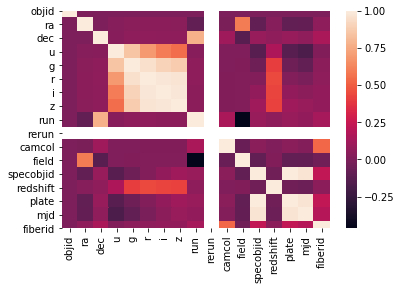

In [126]:
sns.heatmap(df.corr())

Observations:
1, 'u','g','r','i' and 'z' are positively correlated to each other.
2. 'u','g','r','i' and 'z' are positively correlated toredshift.
3. specobijd is positively correlated with plate and mjd.
4. plate and mjd are positively correlated with each other.

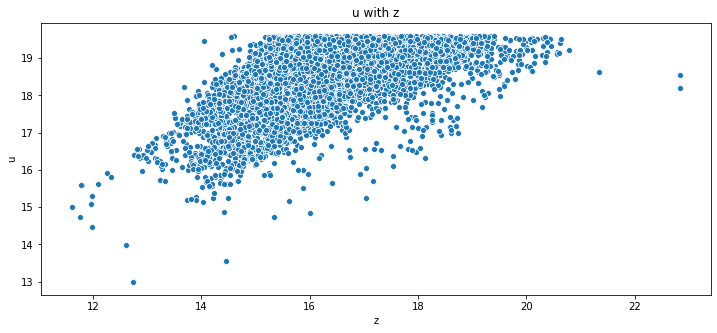

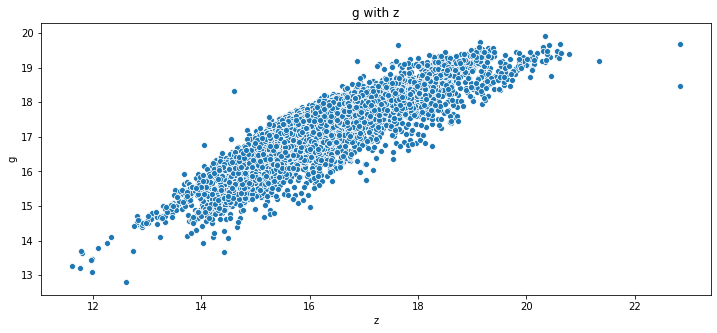

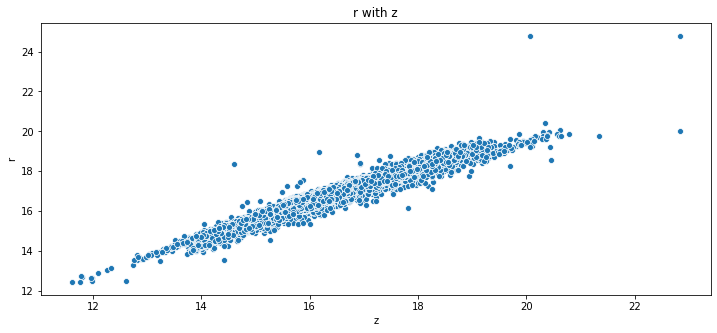

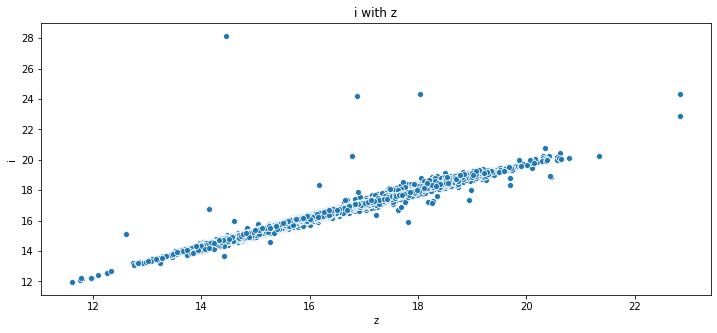

In [51]:
#scatterplots
cols=['u','g','r','i']
for i in cols:
    if dfnew[i].dtypes!='O':
        plt.figure(figsize=(12,5))
        plt.title(str(i)+' with '+'z')
        sns.scatterplot(x=dfnew['z'], y=dfnew[i], data=dfnew)
        plt.show()


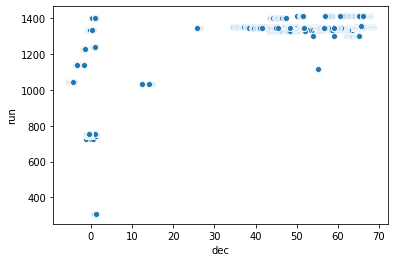

In [52]:
sns.scatterplot(x=dfnew['dec'], y=dfnew['run'], data=dfnew)

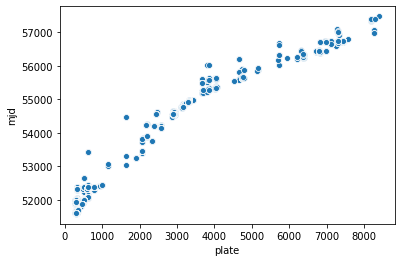

In [53]:
sns.scatterplot(x=dfnew['plate'], y=dfnew['mjd'], data=dfnew)

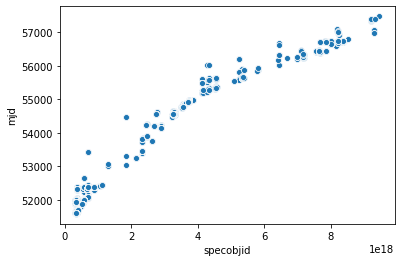

In [54]:
sns.scatterplot(x=dfnew['specobjid'], y=dfnew['mjd'], data=dfnew)

Observations:
1. The plate and mjd, specobjid and mjd are positively correlated to each other.
2. 'u','g','r','i' and 'z' are positively correlated to each other.

#### Analysis by using groupby

In [124]:
dfnew.groupby('class').mean()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
class,,,,,,,,,,,,,,,
GALAXY,177.333570,15.764372,18.804339,17.350216,16.649506,16.272770,16.017923,996.711685,3.654662,300.963585,5.379141e+17,0.080325,477.680672,52030.280912,340.108844
QSO,177.468000,20.570639,18.942928,18.678714,18.498535,18.360007,18.274761,1036.120000,3.694118,304.983529,1.447231e+18,1.218366,1285.305882,52694.289412,381.558824
STAR,172.962158,12.544824,18.330439,17.130547,16.732093,16.594047,16.531119,950.886561,3.632225,303.552264,3.018202e+18,0.000043,2680.613198,54093.892823,362.838391


1. Stars are visible at lower range of ra and dec, at little higher range Galaxies are visible and at the highest range, QSO are visible.
2. Similarly the highest range of u, g, r, i and z are relating to QSO. The next lower range belongs to star and the lowest belong to Galaxy.
3. The highest value of run relating to the scanning image relates to QSO and next lower range belongs to Galaxy and the lowest belongs to Star.
4. The highest mean value of field belongs to QSO and the next lower 303 belongs to star and 300 belongs to Galaxy.
5. The highest plate value at 2680 belongs to star, followed by QSO at 1285 and galaxy at 477.
6. The highest fiberid relates to QSO, followed by star at 362 and galaxy at 340.
7. The highest specobjid relates to star, followed by QSO and galaxy at the last.

#### Label encoding

In [59]:
#let us encode the column class
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
dfnew['class']=lb.fit_transform(dfnew['class'])
dfnew['class']

0       2
1       2
2       0
3       2
4       2
       ..
9995    0
9996    0
9997    2
9998    0
9999    0
Name: class, Length: 10000, dtype: int32

#### removing outliers

In [91]:
from scipy.stats import zscore
z=np.abs(zscore(dfnew))
print("The datashape before removing outliers is", dfnew.shape)
df1=dfnew[(z<3).all(axis=1)]
print("The datashape after removing outliers is", df1.shape)

The datashape before removing outliers is (10000, 16)
The datashape after removing outliers is (8698, 16)


### Separating the input and the output variable

In [92]:
x=df1.drop(['class'],axis=1)
y=pd.DataFrame(df1['class'])
x.head()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,0.000590,3306,54922,512


In [93]:
y.head()

,class
0,2
1,2
2,0
3,2
4,2


#### checking skewness

In [94]:
x.skew()

ra          -0.130951
dec          1.212911
u           -0.981103
g           -0.528033
r           -0.153454
i            0.055966
z            0.167256
run          0.518602
camcol      -0.141193
field        0.220032
specobjid    1.320102
redshift     4.951700
plate        1.320088
mjd          0.963989
fiberid      0.065374
dtype: float64

In [96]:
#using log1p function to reduce skewness
#dec and redshift are excluded in the columnlist as after removing skewness in these two columns, many values in the two columns used to go null.

for i in ['ra', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field', 'specobjid', 'plate', 'mjd', 'fiberid']:
    if x.skew()[i]>0.55:
        x[i]=np.sqrt(x[i])

In [97]:
x.skew()
#The skewness has been reduced to some extent.

ra          -0.130951
dec          1.212911
u           -0.981103
g           -0.528033
r           -0.153454
i            0.055966
z            0.167256
run          0.518602
camcol      -0.141193
field        0.220032
specobjid    0.844365
redshift     4.951700
plate        0.953614
mjd          0.956708
fiberid      0.065374
dtype: float64

### Scaling the data

In [98]:
#using the minmaxscaler to scale the input variables
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.661365,0.074025,0.963691,0.478487,0.380934,0.348769,0.334290,0.402174,0.6,0.338177,0.701670,0.003142,0.621147,0.656067,0.505676
1,0.661658,0.074642,0.729614,0.511772,0.504870,0.500139,0.496166,0.402174,0.6,0.338177,0.039794,0.003107,0.025075,0.007374,0.557276
2,0.662017,0.074519,0.937411,0.700781,0.640450,0.591978,0.553043,0.402174,0.6,0.339498,0.015364,0.096864,0.009524,0.088508,0.528380
3,0.662850,0.073487,0.470670,0.393445,0.417326,0.422306,0.428550,0.402174,0.6,0.340819,0.701671,0.003064,0.621147,0.656067,0.525284
4,0.662906,0.074199,0.408604,0.327818,0.464483,0.510227,0.526948,0.402174,0.6,0.340819,0.701671,0.003598,0.621147,0.656067,0.527348


#### selecting the best random state for splitting the data

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


In [100]:
def max_acc_score(reg,x,y):
    max_score=0
    for r_state in range (42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        acc_score=accuracy_score(test_y,pred)
        print("The accuracy score at r_state", r_state, "is", acc_score)
        if acc_score>max_score:
            max_score=acc_score
            final_r_state=r_state
    print("The maximum accuracy score", max_score, "is achieved at", final_r_state)
    return max_score

In [101]:
lg=LogisticRegression()
max_acc_score(lg,x,y)

The accuracy score at r_state 42 is 0.9166666666666666
The accuracy score at r_state 43 is 0.9120689655172414
The accuracy score at r_state 44 is 0.9241379310344827
The accuracy score at r_state 45 is 0.9183908045977012
The accuracy score at r_state 46 is 0.9287356321839081
The accuracy score at r_state 47 is 0.9189655172413793
The accuracy score at r_state 48 is 0.9172413793103448
The accuracy score at r_state 49 is 0.9201149425287356
The accuracy score at r_state 50 is 0.917816091954023
The accuracy score at r_state 51 is 0.9120689655172414
The accuracy score at r_state 52 is 0.9028735632183909
The accuracy score at r_state 53 is 0.9091954022988505
The accuracy score at r_state 54 is 0.921264367816092
The accuracy score at r_state 55 is 0.9172413793103448
The accuracy score at r_state 56 is 0.9126436781609195
The accuracy score at r_state 57 is 0.9189655172413793
The accuracy score at r_state 58 is 0.924712643678161
The accuracy score at r_state 59 is 0.9155172413793103
The accuracy 

0.9293103448275862

In [102]:
#Lets check the cross val score for the same
cvscore=cross_val_score(lg,x,y,cv=5).mean()
print(cvscore)

0.9164165270861971


In [103]:
#Lets finalise the train and test data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=77,test_size=0.20)


Let us check the different models and we need to use GradientSearchCV to bring out the best parameters for the models

#### Using GridSearchCV

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(train_x,train_y)
gdkn.best_params_

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}

In [106]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x,train_y)
gddt.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [107]:
from sklearn.svm import SVC
sv=SVC()
parameters={'C':(1,10),'kernel':('linear','poly','rbf')}
gdsv=GridSearchCV(sv,parameters)
gdsv.fit(train_x,train_y)
gdsv.best_params_

{'C': 10, 'kernel': 'linear'}

In [109]:
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()
parameters={'alpha':(0.001,0.01,0.1,1)}
gd=GridSearchCV(mb,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'alpha': 0.001}

In [105]:
#After obtaining best parameters, we should now check the models

In [117]:
from sklearn.metrics import accuracy_score, auc, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.preprocessing import LabelBinarizer

score=[]
cv=[]
rocscore=[]


algorithms=[lg,KNeighborsClassifier(algorithm='auto', n_neighbors= 5, weights='distance'), DecisionTreeClassifier(criterion= 'entropy', splitter= 'best'), SVC(C=10, kernel='linear'),MultinomialNB(alpha=0.001)]

for i in algorithms:
    print(i)
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    accscore=accuracy_score(test_y,pred)
    score.append(accscore)
    print("The accuracy score is ", accscore)
    cvscore=cross_val_score(i,x,y,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(test_y,pred))
    print()
    cm=confusion_matrix(test_y,pred)
    print(cm)
    print()
    lb=LabelBinarizer()
    ytest=lb.fit_transform(test_y)
    predy=lb.fit_transform(pred)
    roc=roc_auc_score(ytest,predy)
    print("The roc auc score is", roc)
    rocscore.append(roc)
    print("\n")
    print("\n")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
The accuracy score is  0.9293103448275862
The cross val score is 0.9164165270861971

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       965
           1       0.96      0.92      0.94        78
           2       0.95      0.88      0.92       697

    accuracy                           0.93      1740
   macro avg       0.94      0.92      0.93      1740
weighted avg       0.93      0.93      0.93      1740


[[931   3  31]
 [  6  72   0]
 [ 83   0 614]]

The roc auc score is 0.9370660439460967




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_j

In [118]:
result=pd.DataFrame({'Model':[LogisticRegression,KNeighborsClassifier, DecisionTreeClassifier, SVC,MultinomialNB],'Accuracy_Score':score,'Cross_val_score':cv, 'AUC_ROC':rocscore})
result

,Model,Accuracy_Score,Cross_val_score,AUC_ROC
0,<class 'sklearn.linear_model.logistic.Logistic...,0.929310,0.916417,0.937066
1,<class 'sklearn.neighbors.classification.KNeig...,0.913218,0.888590,0.919736
2,<class 'sklearn.tree.tree.DecisionTreeClassifi...,0.991379,0.985859,0.987349
3,<class 'sklearn.svm.classes.SVC'>,0.980460,0.980685,0.980004
4,<class 'sklearn.naive_bayes.MultinomialNB'>,0.841954,0.827085,0.174224



From the above model comparison, we can conclude that DecisionTreeClassifier is performing well. Hence let us finalise the model.

In [119]:
#Let us finalise the DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion= 'entropy', splitter= 'best')
dt.fit(train_x,train_y)
pred=dt.predict(test_x)
acc_score=accuracy_score(test_y,pred)
crossval=cross_val_score(dt,x,y,cv=5,scoring='accuracy').mean()
print("The accuracy score is", acc_score)
print("The cross validation score is", crossval)

The accuracy score is 0.9902298850574712
The cross validation score is 0.9864336701923657


In [120]:
#saving the finalised model
from sklearn.externals import joblib
joblib.dump(dt,'Project8_Skyserver.pkl')

['Project8_Skyserver.pkl']